In [1]:
require(abind)
require(data.table)
require(deSolve)
require(magrittr)
require(np)
require(rTensor)

require(ggplot2)
require(GGally)

Loading required package: abind
Loading required package: data.table
Loading required package: deSolve
Loading required package: magrittr
Loading required package: np
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘np’”Loading required package: rTensor
Loading required package: ggplot2
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [14]:
xs = fread("framework/xs.tsv")
xs %>% dim

[1] 248  18

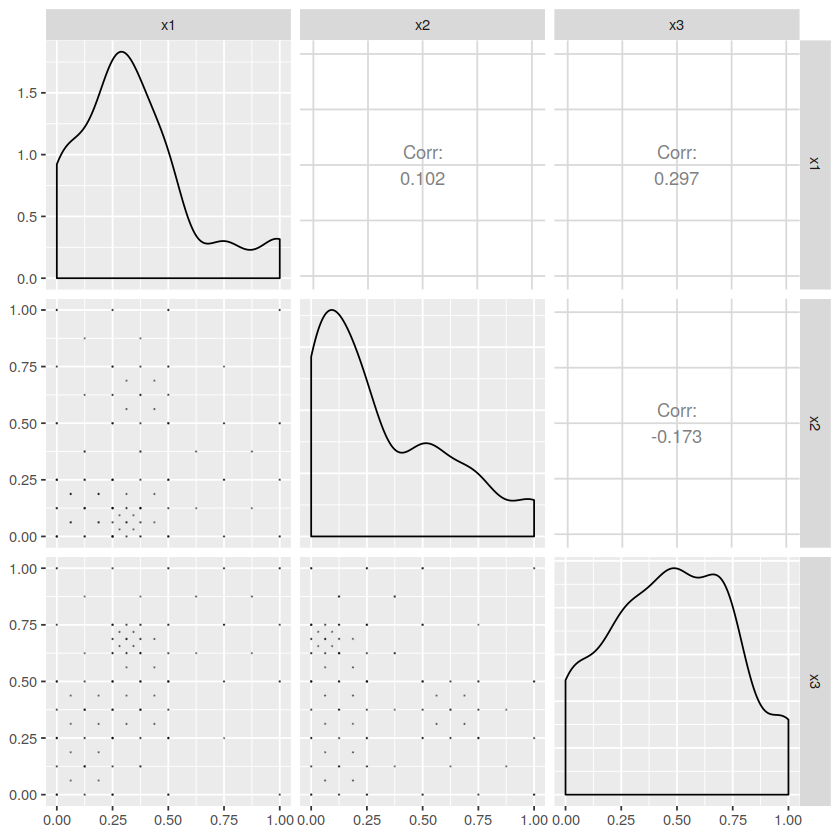

In [15]:
ggpairs(
    xs,
    6:8,
#   mapping = aes(color=factor(mapply(ssa.depth, i1))),
    lower = list(continuous = wrap("points", alpha = 0.2, size=0.05))
)